In [2]:
import numpy as np
import pickle as pkl
import torch
from sklearn.model_selection import train_test_split
import torch.nn as nn   
import time
import torch.optim as optim
import torch
from torch.utils.data import TensorDataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

def load_data(path):
    with open(path, 'rb') as f:
        data = pkl.load(f)
    return data

# Load the data
Interaction_matrices = load_data('interaction_matrices_10binned.pkl')
spectral_data = load_data('spectra_dataset_10binned.pkl')

print(Interaction_matrices.shape)
print(spectral_data.shape)

cpu
torch.Size([100000, 6, 6])
torch.Size([100000, 2000])


In [3]:
print(Interaction_matrices[1:10])

tensor([[[0.0000e+00, 2.3849e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.5487e-01,
          0.0000e+00],
         [0.0000e+00, 0.0000e+00, 5.6142e-01, 4.7218e-01, 0.0000e+00,
          9.5730e-03],
         [1.1606e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.5414e-01,
          0.0000e+00],
         [0.0000e+00, 9.7943e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [0.0000e+00, 6.2552e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          9.3345e-01],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 3.6906e-01, 2.3893e-01,
          0.0000e+00],
         [0.0000e+00, 0.0000e+00, 3.0346e-02, 0.0000e+00, 0.0000e+00

In [4]:
import numpy as np
import torch

# Flatten each matrix separately then store in an array
flattened_matrices = [matrix.flatten() for matrix in Interaction_matrices]

# Stack the flattened matrices on top to give shape N x 36
flattened_matrix = torch.stack(flattened_matrices)
print(flattened_matrix.shape)
flattened_matrices = torch.tensor(flattened_matrix, dtype=torch.float32)

print(flattened_matrix[0:10]) ## fine. 

reshape_matrices = flattened_matrix.reshape(-1, 6, 6)
print(reshape_matrices.shape)
print(reshape_matrices[0:10]) ## reshapes fine but just make sure it is reshaped with torch

torch.Size([100000, 36])
tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         6.9883e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         4.9843e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 9.3328e-01, 7.5089e-01, 0.0000e+00, 0.0000e+00,
         3.0173e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 2.3849e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.5487e-01, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 5.6142e-01, 4.7218e-01, 0.0000e+00, 9.5730e-03,
         1.1606e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.5414e-01, 0.0000e+00,
         0.0000e+00, 9.7943e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
 

/var/folders/02/fvfmdq_j709g1tthj47t5fcm0000gn/T/ipykernel_9088/671238023.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  flattened_matrices = torch.tensor(flattened_matrix, dtype=torch.float32)


In [5]:
print(flattened_matrix[1])
print(flattened_matrix.dtype)


tensor([0.0000e+00, 2.3849e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.5487e-01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 5.6142e-01, 4.7218e-01, 0.0000e+00, 9.5730e-03,
        1.1606e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.5414e-01, 0.0000e+00,
        0.0000e+00, 9.7943e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])
torch.float32


In [6]:
import pandas as pd
import torch
import numpy as np


# need to turn tensors to pandas df then append my flattened matrices to the end.
matrix_columns = [f'PA{i // 6}PB{i % 6}' for i in range(len(flattened_matrices[0]))]

bnry_int_mat_df = pd.DataFrame(flattened_matrices, columns = matrix_columns)
print(bnry_int_mat_df.shape)
print(bnry_int_mat_df)
spec_df = pd.DataFrame(spectral_data)
print(spec_df.shape)
print(spec_df.dtypes)
print(bnry_int_mat_df.dtypes)


(100000, 36)
       PA0PB0    PA0PB1    PA0PB2  PA0PB3  PA0PB4    PA0PB5    PA1PB0  \
0         0.0  0.000000  0.000000     0.0     0.0  0.000000  0.698825   
1         0.0  0.000238  0.000000     0.0     0.0  0.000000  0.000000   
2         0.0  0.000000  0.000000     0.0     0.0  0.000000  0.000000   
3         0.0  0.590379  0.000000     0.0     0.0  0.757387  0.000000   
4         0.0  0.000000  0.000000     0.0     0.0  0.000000  0.196453   
...       ...       ...       ...     ...     ...       ...       ...   
99995     0.0  0.603816  0.841153     0.0     0.0  0.000000  0.000000   
99996     0.0  0.714708  0.488617     0.0     0.0  0.000000  0.548852   
99997     0.0  0.000000  0.000000     0.0     0.0  0.000000  0.279194   
99998     0.0  0.000000  0.000000     0.0     0.0  0.000000  0.000000   
99999     0.0  0.000000  0.000000     0.0     0.0  0.000000  0.109624   

         PA1PB1  PA1PB2    PA1PB3  ...    PA4PB2  PA4PB3    PA4PB4    PA4PB5  \
0      0.000000     0.0  0.000

In [7]:
# next  concat the two together 
import pandas as pd



concat_df = pd.concat([spec_df, bnry_int_mat_df], axis =1)

In [8]:
print(concat_df.shape)
concat_df.iloc[1, 2000:] # row 1 and all columns after 2000 - where the int matrices start


(100000, 2036)


PA0PB0    0.000000
PA0PB1    0.000238
PA0PB2    0.000000
PA0PB3    0.000000
PA0PB4    0.000000
PA0PB5    0.000000
PA1PB0    0.000000
PA1PB1    0.000000
PA1PB2    0.000000
PA1PB3    0.000000
PA1PB4    0.654868
PA1PB5    0.000000
PA2PB0    0.000000
PA2PB1    0.000000
PA2PB2    0.561424
PA2PB3    0.472181
PA2PB4    0.000000
PA2PB5    0.009573
PA3PB0    0.116056
PA3PB1    0.000000
PA3PB2    0.000000
PA3PB3    0.000000
PA3PB4    0.000000
PA3PB5    0.000000
PA4PB0    0.000000
PA4PB1    0.000000
PA4PB2    0.000000
PA4PB3    0.000000
PA4PB4    0.354136
PA4PB5    0.000000
PA5PB0    0.000000
PA5PB1    0.097943
PA5PB2    0.000000
PA5PB3    0.000000
PA5PB4    0.000000
PA5PB5    0.000000
Name: 1, dtype: float32

In [9]:
# concat_df.to_csv("binned_by_10_labelled_ANN.csv") # save the data to a csv file.  but its too big lol

In [10]:
# import libraries
import torch
import torch.nn as nn



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cpu


In [11]:
# pre process data some more
print(concat_df.dtypes)

X_spec = concat_df.iloc[:, :2000].values # spectra data # iloc in pandas is used to select rows and columns by number, in the order that they appear in the data frame.
Y_matr = concat_df.iloc[:, 2000:].values # matrices 

print(X_spec.shape)
print(Y_matr.shape)

print(X_spec.dtype)
print(Y_matr.dtype)



0         float32
1         float32
2         float32
3         float32
4         float32
           ...   
PA5PB1    float32
PA5PB2    float32
PA5PB3    float32
PA5PB4    float32
PA5PB5    float32
Length: 2036, dtype: object
(100000, 2000)
(100000, 36)
float32
float32


In [12]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split

# splitting into train test val split 80, 20 
X_train, X_test, y_train, y_test = train_test_split(X_spec, Y_matr, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

print(y_val.dtype)
print(X_val.dtype)
print(X_train.dtype)
print(y_train.dtype)


float32
float32
float32
float32


In [13]:
import torch 
from torch.utils.data import DataLoader, TensorDataset

X_train = torch.Tensor(X_train).to(device)
X_test = torch.Tensor(X_test).to(device)
X_val = torch.Tensor(X_val).to(device)
y_val= torch.Tensor(y_val).to(device)
y_train = torch.Tensor(y_train).to(device)
y_test = torch.Tensor(y_test).to(device)


batch_size = 512 ## 512 is a good number for now. ?? 256 also worked well.
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [14]:
print(X_train.shape) # confirmed shape 8000,2000

torch.Size([80000, 2000])


In [15]:
class SpectralNet(nn.Module):
    def __init__(self):
        super(SpectralNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2000, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256), ### add dropout at some point
            nn.ReLU(),
            nn.Linear(256, 128),  # Added layer
            nn.ReLU(),  # Added activation function
            nn.Linear(128, 36),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)
    
    ## add layers? dropout and maybe more batch norm? 

In [16]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

model = SpectralNet().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # 0.001 works better for some reason
#scheduler = ReduceLROnPlateau(optimizer, 'min', patience=10, factor=0.5, min_lr=1e-6)

In [200]:
print(model)

SpectralNet(
  (model): Sequential(
    (0): Linear(in_features=2000, out_features=1024, bias=True)
    (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=256, bias=True)
    (6): ReLU()
    (7): Linear(in_features=256, out_features=128, bias=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=36, bias=True)
    (10): Sigmoid()
  )
)


In [21]:
# Training loop
epoch_losses = []


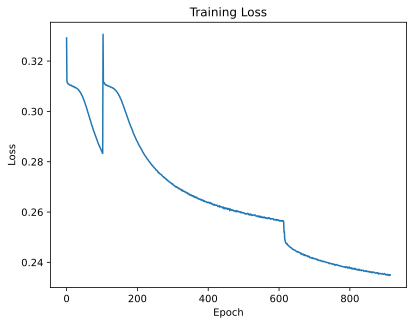

In [404]:
import matplotlib.pyplot as plt

plt.plot(epoch_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


In [22]:
import torch
import os
import torch.nn as nn
import torch.optim as optim


# loading a model from a checkpoint for further training

def load_checkpoint(model, optimizer, loss, filename='checkpoint.pth.tar'):
    # Note: Input model & optimizer should be pre-defined.  This routine only updates their states.
    start_epoch = 0
    if os.path.isfile(filename):
        print("=> loading checkpoint '{}'".format(filename))
        checkpoint = torch.load(filename)
        start_epoch = checkpoint['epoch']
        model.load_state_dict(checkpoint['state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer'])
        loss = checkpoint['loss']
        print("=> loaded checkpoint '{}' (epoch {})"
                  .format(filename, checkpoint['epoch']))
    else:
        print("=> no checkpoint found at '{}'".format(filename))

    return model, optimizer, start_epoch, loss

load_checkpoint(model, optimizer, epoch_losses, filename='spectral_net_model.pth')

=> loading checkpoint 'spectral_net_model.pth'
=> loaded checkpoint 'spectral_net_model.pth' (epoch 300)


(SpectralNet(
   (model): Sequential(
     (0): Linear(in_features=2000, out_features=1024, bias=True)
     (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (2): ReLU()
     (3): Linear(in_features=1024, out_features=512, bias=True)
     (4): ReLU()
     (5): Linear(in_features=512, out_features=256, bias=True)
     (6): ReLU()
     (7): Linear(in_features=256, out_features=128, bias=True)
     (8): ReLU()
     (9): Linear(in_features=128, out_features=36, bias=True)
     (10): Sigmoid()
   )
 ),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0
 ),
 300,
 [0.3292034139299089,
  0.31203128995409435,
  0.3114895862378892,
  0.31134179158575215,
  0.3109347932277971,
  0.31098827586811817,
  0.3108250386775679,
  0.31066150251467517,
  0.31053827010142576,
  0.3104701

In [19]:
num_epochs = 0


for epoch in range(num_epochs):
    epoch_loss = 0
    epoch_accuracy = 0

    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        epoch_loss += loss.item()

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


    epoch_loss /= len(train_loader)
    epoch_losses.append(epoch_loss)
    epoch_accuracy /= len(train_loader)


    # Print the loss and accuracy every 100 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
     
    if (epoch + 1) % 100 == 0:
        state = {
            'epoch': epoch + 1,
            'state_dict': model.state_dict(),
            'optimizer': optimizer.state_dict(),
            'loss': epoch_losses
        }
        torch.save(state, "spectral_net_model.pth") ## save the model every 100 epochs
        print("Saved model to:", "spectral_net_model.pth")   

 lr 0.001 and 512 batch size works best - epoch loss decreased most. 
 going to try adding one more layer and see how it goes
 added in batchnorm1d first to see what happens then will add a layer if neccessary - this helped tremendously with that lr and batch_size. loss has decreased from 0.3105 to 0.3002 in just 60 epochs.
 without batchnorm1d it decreased 0.0002 for 100 epochs. 
 trying 500 epochs now


 #### assessing metrics

##### example based metrics? 
 * Hammingloss - computes the propportion of incorrectly predicted labels to the total number of labels.
 * False positives and False negatives (fp and fn ) respectively per instance and then average it over the total number of training instances
 * see blog https://medium.com/datadriveninvestor/a-survey-of-evaluation-metrics-for-multilabel-classification-bb16e8cd41cd
 * Accuracy is the average accuracy across the training instances but how would this work for me ? we can for example say it is correct if y_pred is within 0.2 of y_true 
 * precision defined as the proportion of predicted correct labels to the total number of predicted labels averaged over all the instances.

 ##### label based metrics

 * Macro averaged accuracy 
 * Macro averaged precision
 * macro averaged Recall
 * micro averaged accuracy
 * micro averaged precision
 * micro averaged recall

 ##### alpha - evaluation score 
 
 see the blog for more info.



 

In [24]:
import torch
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = torch.tensor([]).to(device)
y_true = torch.tensor([]).to(device)

epoch_loss = 0

with torch.no_grad():
    model.eval()
    for spectra, matrices in val_loader:
        outputs = model(spectra)
        print(outputs.size())
        loss = criterion(outputs, matrices)
        epoch_loss += loss.item()
        y_pred = torch.cat((y_pred, outputs), dim=0)
        y_true = torch.cat((y_true, matrices), dim=0)
    epoch_loss /= len(val_loader)

    
    print(f"Validation Loss: {epoch_loss:.4f}")

torch.Size([512, 36])
torch.Size([512, 36])
torch.Size([512, 36])
torch.Size([512, 36])
torch.Size([512, 36])
torch.Size([512, 36])
torch.Size([512, 36])
torch.Size([416, 36])
Validation Loss: 0.4434


In [25]:
y_true.size()

torch.Size([4000, 36])

In [26]:
## matrix correlation element wise.
from scipy.stats import pearsonr
from scipy.stats import spearmanr

pearson_coeff = []
pearson_pval = []
spearman_coeff = []
spearman_pval = []

num_matrices = y_true.size(0)

for i in range(num_matrices):
    pearsonr_coeff, pearson_p_value = pearsonr(y_true[i], y_pred[i])
    pearson_coeff.append(pearsonr_coeff)
    pearson_pval.append(pearson_p_value)

    spearmanr_coeff, spearman_p_val = spearmanr(y_true[i], y_pred[i])
    spearman_coeff.append(spearmanr_coeff)
    spearman_pval.append(spearman_p_val)


In [27]:
print(f"Mean Pearson Correlation: {np.mean(pearson_coeff):.4f}")
print(f"Mean Spearman Correlation: {np.mean(spearman_coeff):.4f}")

print(f"Mean Pearson P-value: {np.mean(pearson_pval):.4f}")
print(f"Mean Spearman P-value: {np.mean(spearman_pval):.4f}")

Mean Pearson Correlation: 0.0159
Mean Spearman Correlation: 0.0262
Mean Pearson P-value: 0.5070
Mean Spearman P-value: 0.4961


In [443]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# rounding to 2 decimal places for thresholding
y_pred = np.around(y_pred, decimals=2)
y_true = np.around(y_true, decimals=2)

y_true = torch.tensor(y_true)
y_pred = torch.tensor(y_pred)





/var/folders/02/fvfmdq_j709g1tthj47t5fcm0000gn/T/ipykernel_76017/2181615228.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true)
/var/folders/02/fvfmdq_j709g1tthj47t5fcm0000gn/T/ipykernel_76017/2181615228.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = torch.tensor(y_pred)


In [448]:
import torch
### check that y_true and y_val match !!! i turned off shuffeling so that i could do this.

Batch 1:
Inputs: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Labels: tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0297, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.7665,  ..., 0.0000, 0.0000, 0.4264],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.7485, 0.0000]])
Batch 2:
Inputs: tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.3824e-36, 1.8944e-36,
         5.9870e-37],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 4.5934e-35, 3.6526e-35,
         1.1543e-35],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.0985e-34, 8.7348e-35,
         2.7605e-35],
        ...,
  

In [388]:
import torch

# Threshold-based Accuracy ?? is this a thing

threshold = 0.2

matching_elements_total = 0
total_elements = 0

for i in range(len(y_true)):
    y_true_one = y_true[i]
    y_pred_one = y_pred[i]
    
    difference = torch.abs(y_true_one - y_pred_one)
    matching_elements = torch.sum(difference < threshold).item()
    
    matching_elements_total += matching_elements
    total_elements += difference.numel()

print(f"Total number of matching elements: {matching_elements_total}")
print(f"Total number of elements: {total_elements}")
print(f"Overall percentage of matching elements: {matching_elements_total / total_elements * 100:.2f}%")

Total number of matching elements: 108129
Total number of elements: 144000
Overall percentage of matching elements: 75.09%


In [389]:
threshold = 0.1

binary_y_true = np.where(y_true > threshold, 1, 0)
print(binary_y_true.shape)

binary_y_pred = np.where(y_pred > threshold, 1, 0)
print(binary_y_pred.shape)

(4000, 36)
(4000, 36)


In [390]:
import numpy as np

def label_based_macro_precision(y_true, y_pred):
    # Exclude the first class/label (position 0)
    y_true = y_true[:, 1:]
    y_pred = y_pred[:, 1:]
    
    # axis = 0 computes true positive along columns i.e., labels
    l_prec_num = np.sum(np.logical_and(y_true, y_pred), axis=0)
    
    # axis = 0 computes true_positive + false positive along columns i.e., labels
    l_prec_den = np.sum(y_pred, axis=0)
    
    # compute precision per class/label
    l_prec_per_class = l_prec_num / l_prec_den
    
    # macro precision = average of precision across labels
    l_prec = np.mean(l_prec_per_class)
    
    return l_prec

lb_macro_precision_val = label_based_macro_precision(binary_y_true, binary_y_pred)
print(f"Label Based Precision: {lb_macro_precision_val}")

## high false positive rate 

Label Based Precision: 0.17505791093449508


In [391]:
def label_based_macro_accuracy(y_true, y_pred):

    # Exclude the first class/label (position 0)
    y_true = y_true[:, 1:]
    y_pred = y_pred[:, 1:]
	
    # axis = 0 computes true positives along columns i.e labels
    l_acc_num = np.sum(np.logical_and(y_true, y_pred), axis = 0)

    # axis = 0 computes true postive + false positive + false negatives along columns i.e labels
    l_acc_den = np.sum(np.logical_or(y_true, y_pred), axis = 0)

    # compute mean accuracy across labels. 
    return np.mean(l_acc_num/l_acc_den)

lb_macro_acc_val = label_based_macro_accuracy(binary_y_true, binary_y_pred)
print(f"Label Based Macro Accuracy: {lb_macro_acc_val}")

Label Based Macro Accuracy: 0.12347841384286863


In [392]:
def label_based_macro_recall(y_true, y_pred):

    y_true = y_true[:, 1:]
    y_pred = y_pred[:, 1:]
    
    # compute true positive along axis = 0 i.e labels
    l_recall_num = np.sum(np.logical_and(y_true, y_pred), axis = 0)

    # compute true positive + false negatives along axis = 0 i.e columns
    l_recall_den = np.sum(y_true, axis = 0)

    # compute recall per class/label
    l_recall_per_class = l_recall_num/l_recall_den

    # compute macro averaged recall i.e recall averaged across labels. 
    l_recall = np.mean(l_recall_per_class)
    return l_recall

lb_macro_recall_val = label_based_macro_recall(binary_y_true, binary_y_pred) 
print(f"Label Based Recall: {lb_macro_recall_val}")

Label Based Recall: 0.29656170866752973


In [393]:
def label_based_micro_accuracy(y_true, y_pred):

    y_true = y_true[:, 1:]
    y_pred = y_pred[:, 1:]
    
    # sum of all true positives across all examples and labels 
    l_acc_num = np.sum(np.logical_and(y_true, y_pred))

    # sum of all tp+fp+fn across all examples and labels.
    l_acc_den = np.sum(np.logical_or(y_true, y_pred))

    # compute mirco averaged accuracy
    return l_acc_num/l_acc_den

lb_micro_acc_val = label_based_micro_accuracy(binary_y_true, binary_y_pred)
print(f"Label Based Micro Accuracy: {lb_micro_acc_val}")

Label Based Micro Accuracy: 0.12350495354447924


In [394]:
def label_based_micro_precision(y_true, y_pred):

    y_true = y_true[:, 1:]
    y_pred = y_pred[:, 1:]
    
    # compute sum of true positives (tp) across training examples
    # and labels. 
    l_prec_num = np.sum(np.logical_and(y_true, y_pred))

    # compute the sum of tp + fp across training examples and labels
    l_prec_den = np.sum(y_pred)

    # compute micro-averaged precision
    return l_prec_num/l_prec_den

lb_micro_prec_val = label_based_micro_precision(binary_y_true, binary_y_pred)
print(f"Label Based Micro Precision: {lb_micro_prec_val}")

Label Based Micro Precision: 0.17465579403295667


In [395]:
# Function for Computing Label Based Micro Averaged Recall 
# for a MultiLabel Classification problem. 

def label_based_micro_recall(y_true, y_pred):
    y_true = y_true[:, 1:]
    y_pred = y_pred[:, 1:]
	
    # compute sum of true positives across training examples and labels.
    l_recall_num = np.sum(np.logical_and(y_true, y_pred))
    # compute sum of tp + fn across training examples and labels
    l_recall_den = np.sum(y_true)

    # compute mirco-average recall
    return l_recall_num/l_recall_den

lb_micro_recall_val = label_based_micro_recall(binary_y_true, binary_y_pred)
print(f"Label Based Micro Recall: {lb_micro_recall_val}")

Label Based Micro Recall: 0.29662201035588065


In [396]:
def alpha_evaluation_score(y_true, y_pred):

    y_true = y_true[:, 1:]
    y_pred = y_pred[:, 1:]

    alpha = 1
    beta = 0.25
    gamma = 1
    
    # compute true positives across training examples and labels
    tp = np.sum(np.logical_and(y_true, y_pred))
    
    # compute false negatives (Missed Labels) across training examples and labels
    fn = np.sum(np.logical_and(y_true, np.logical_not(y_pred)))
    
    # compute False Positive across training examples and labels.
    fp = np.sum(np.logical_and(np.logical_not(y_true), y_pred))
        
    # Compute alpha evaluation score
    alpha_score = (1 - ((beta * fn + gamma * fp ) / (tp +fn + fp + 0.00001)))**alpha 
    
    return alpha_score

alpha_score = alpha_evaluation_score(binary_y_true, binary_y_pred)
print(f"Alpha Evaluation Score: {alpha_score}")

Alpha Evaluation Score: 0.3431548689589592


In [397]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def calculate_metrics(y_true, y_pred):

    y_true = y_true[:, 1:]
    y_pred = y_pred[:, 1:]

    # Calculate micro-averaged metrics
    macro_precision = precision_score(y_true, y_pred, average='macro')
    macro_recall = recall_score(y_true, y_pred, average='macro')
    macro_f1 = f1_score(y_true, y_pred, average='macro')
    macro_accuracy = accuracy_score(y_true, y_pred)

    # Calculate per-label metrics
    per_label_precision = precision_score(y_true, y_pred, average=None)
    per_label_recall = recall_score(y_true, y_pred, average=None)
    per_label_f1 = f1_score(y_true, y_pred, average=None)


    # Print micro-averaged metrics
    print("Micro-averaged Metrics:")
    print(f"  Precision: {macro_precision:.2f}")
    print(f"  Recall: {macro_recall:.2f}")
    print(f"  F1-score: {macro_f1:.2f}")
    print(f"  Accuracy: {macro_accuracy:.2f}")

    # Print per-label metrics
    print("\nPer-label Metrics:")
    for label in range(y_true.shape[1]):
        print(f"Label {label+1}:")
        print(f"  Precision: {per_label_precision[label]:.2f}")
        print(f"  Recall: {per_label_recall[label]:.2f}")
        print(f"  F1-score: {per_label_f1[label]:.2f}")

        label_accuracy = accuracy_score(y_true[:, label], y_pred[:, label])
        print(f"  Accuracy: {label_accuracy:.4f}")

    
    
    return macro_precision, macro_recall, macro_f1, macro_accuracy, per_label_precision, per_label_recall, per_label_f1

    


calculate_metrics(binary_y_true, binary_y_pred)

Micro-averaged Metrics:
  Precision: 0.18
  Recall: 0.30
  F1-score: 0.22
  Accuracy: 0.00

Per-label Metrics:
Label 1:
  Precision: 0.19
  Recall: 0.33
  F1-score: 0.24
  Accuracy: 0.6252
Label 2:
  Precision: 0.18
  Recall: 0.27
  F1-score: 0.22
  Accuracy: 0.6567
Label 3:
  Precision: 0.18
  Recall: 0.30
  F1-score: 0.23
  Accuracy: 0.6222
Label 4:
  Precision: 0.19
  Recall: 0.29
  F1-score: 0.23
  Accuracy: 0.6492
Label 5:
  Precision: 0.13
  Recall: 0.29
  F1-score: 0.18
  Accuracy: 0.6262
Label 6:
  Precision: 0.17
  Recall: 0.27
  F1-score: 0.21
  Accuracy: 0.6488
Label 7:
  Precision: 0.18
  Recall: 0.30
  F1-score: 0.23
  Accuracy: 0.6385
Label 8:
  Precision: 0.16
  Recall: 0.30
  F1-score: 0.21
  Accuracy: 0.6088
Label 9:
  Precision: 0.16
  Recall: 0.31
  F1-score: 0.21
  Accuracy: 0.6108
Label 10:
  Precision: 0.17
  Recall: 0.31
  F1-score: 0.22
  Accuracy: 0.6305
Label 11:
  Precision: 0.17
  Recall: 0.29
  F1-score: 0.22
  Accuracy: 0.6248
Label 12:
  Precision: 0.17
 

(0.17505791093449508,
 0.29656170866752973,
 0.21970460018806398,
 0.0,
 array([0.18784972, 0.18095238, 0.1809291 , 0.18918919, 0.13483146,
        0.16955333, 0.18135158, 0.16291699, 0.15966387, 0.17366255,
        0.17398509, 0.16981132, 0.18846154, 0.17583333, 0.20153061,
        0.17983193, 0.18246236, 0.15174129, 0.18578767, 0.148382  ,
        0.184107  , 0.16637631, 0.16438356, 0.16035635, 0.1636528 ,
        0.18037135, 0.18072289, 0.20389249, 0.18369453, 0.18765638,
        0.17427702, 0.17540323, 0.16564417, 0.17542297, 0.18233851]),
 array([0.32729805, 0.27027027, 0.30494505, 0.29453015, 0.28717949,
        0.27352941, 0.30242511, 0.30172414, 0.31381381, 0.3080292 ,
        0.29411765, 0.32514451, 0.25960265, 0.30272597, 0.33427362,
        0.30014025, 0.30473373, 0.27313433, 0.30780142, 0.27325581,
        0.32409972, 0.26788219, 0.27785818, 0.32      , 0.27136432,
        0.30088496, 0.31077348, 0.29333333, 0.26215022, 0.30821918,
        0.33726068, 0.26165414, 0.29716981

/Users/sanazkazeminia/anaconda3/envs/Mass_Spec/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sanazkazeminia/anaconda3/envs/Mass_Spec/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sanazkazeminia/anaconda3/envs/Mass_Spec/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score

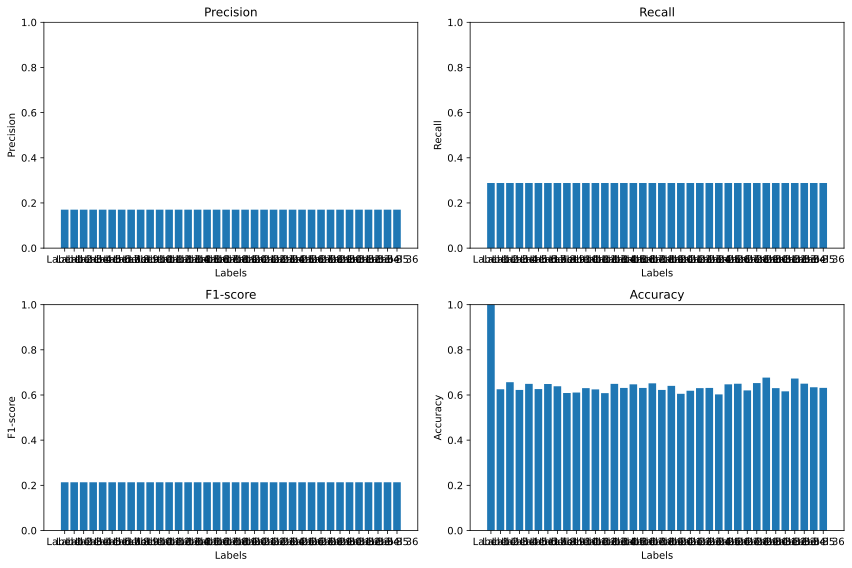

In [398]:
import matplotlib.pyplot as plt
import numpy as np

def plot_metrics(y_true, y_pred):
    # Calculate per-label metrics
    per_label_precision = precision_score(y_true, y_pred, average="macro")
    per_label_recall = recall_score(y_true, y_pred, average="macro")
    per_label_f1 = f1_score(y_true, y_pred, average="macro")
    
    # Create labels for x-axis
    labels = [f'Label {i+1}' for i in range(y_true.shape[1])]
    
    # Create a figure with subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    
    # Plot precision
    axs[0, 0].bar(labels, per_label_precision)
    axs[0, 0].set_title('Precision')
    axs[0, 0].set_xlabel('Labels')
    axs[0, 0].set_ylabel('Precision')
    axs[0, 0].set_ylim([0, 1])
    
    # Plot recall
    axs[0, 1].bar(labels, per_label_recall)
    axs[0, 1].set_title('Recall')
    axs[0, 1].set_xlabel('Labels')
    axs[0, 1].set_ylabel('Recall')
    axs[0, 1].set_ylim([0, 1])
    
    # Plot F1-score
    axs[1, 0].bar(labels, per_label_f1)
    axs[1, 0].set_title('F1-score')
    axs[1, 0].set_xlabel('Labels')
    axs[1, 0].set_ylabel('F1-score')
    axs[1, 0].set_ylim([0, 1])
    
    # Plot accuracy
    per_label_accuracy = []
    for label in range(y_true.shape[1]):
        label_accuracy = accuracy_score(y_true[:, label], y_pred[:, label])
        per_label_accuracy.append(label_accuracy)
    
    axs[1, 1].bar(labels, per_label_accuracy)
    axs[1, 1].set_title('Accuracy')
    axs[1, 1].set_xlabel('Labels')
    axs[1, 1].set_ylabel('Accuracy')
    axs[1, 1].set_ylim([0, 1])
    
    # Adjust spacing between subplots
    plt.tight_layout()
    
    # Display the plots
    plt.show()

  # Your predicted labels (numpy array of shape (num_samples, num_labels))

plot_metrics(binary_y_true, binary_y_pred)

In [29]:
y_pred = y_pred.reshape(-1, 6, 6)
y_true = y_true.reshape(-1, 6, 6)

In [30]:
print(y_pred.shape)
print(y_true.shape)



torch.Size([4000, 6, 6])
torch.Size([4000, 6, 6])


In [31]:
import numpy as np

matrix = y_pred[0]
print(matrix)
matrix = matrix.reshape(6, 6)
matrix.shape
matrix = matrix.numpy()

# function to sep the matrices in the predicted matrix. Then i want to plot each one into spectra

def creating_single_matrices(matrices):
    new_matrices = []
    for matrix in matrices:
        rows, cols = matrix.shape

        for i in range(rows):
            for j in range(cols):
                if matrix[i, j] > 0:
                    new_matrix = np.zeros((rows, cols))
                    new_matrix[i, j] =  matrix[i, j]
                    new_matrices.append(new_matrix)
    return new_matrices

new_pred_matrices = creating_single_matrices(y_pred)
print(new_pred_matrices[1])




tensor([[5.5839e-26, 2.5397e-02, 6.5831e-02, 5.9346e-01, 1.7994e-02, 1.5055e-01],
        [7.8661e-02, 1.0597e-01, 5.8777e-02, 1.4965e-01, 2.9014e-01, 1.7205e-02],
        [3.9764e-02, 8.1781e-02, 5.4231e-02, 5.9783e-02, 1.2443e-01, 2.9411e-01],
        [1.9178e-03, 1.5925e-01, 1.0920e-01, 3.7917e-02, 1.6067e-01, 6.9939e-02],
        [5.8060e-02, 2.9135e-02, 3.9790e-02, 1.5515e-01, 6.5079e-02, 3.8151e-02],
        [2.1030e-02, 7.7509e-02, 4.3647e-03, 2.2636e-03, 2.5322e-01, 1.5561e-02]])


[[0.         0.02539722 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


In [32]:
from Mass_Spec_Simulator import NativeMassSpecSimulator
import numpy as np
import torch 
import pickle
import psutil
import time

# this part takes absolutely forever - only do it for a maybe 10 y_pred matrices 
#  did it for 4000 and it took over 2 hours.
# not neccessary for it all

if __name__ == '__main__':
    print(f'Running simulator at {time.time()}')
    Gen = NativeMassSpecSimulator(
        monomer_masses=[25644, 90885],  # Masses of the monomers
        resolution=1000,
        chargewidth=10,
        maxcharge=50,
        noise_level=0.000,
        Q=0.1,
        F=1,
        AO=1,
        VA=1
    )

    interaction_matrix = creating_single_matrices(y_pred)


    spectra_dataset = torch.zeros((len(interaction_matrix), 2000))
        
    # this could go in a fx in the class to reduce verbosity of the code. Can also just save as PT tensors instead of pkl
    # saving this way on my own laptop for 10k took 1.4MB for interaction matrices and 800MB for spectra - pretty good.
    # took 2 hours to generate 100k spectra - not bad 
    # 17 mins per 10k spectra but around 40 mins less in practise 


    for i in range(len(interaction_matrix)):
            binned_mz_range, binned_normalized_spectrum = Gen.generate_spectrum_from_pred(interaction_matrix[i])
            spectra_dataset[i] = torch.tensor(binned_normalized_spectrum)

    with open('single_from_pred.pkl', 'wb') as f:
        pickle.dump(spectra_dataset, f)


    print(f'Finished simulator at {time.time()}')

Running simulator at 1715014445.7474859
Finished simulator at 1715023139.154473


In [37]:
singular_spectra = load_data('single_from_pred.pkl')
print(singular_spectra.shape)

print(len(interaction_matrix))

torch.Size([143609, 2000])
143609


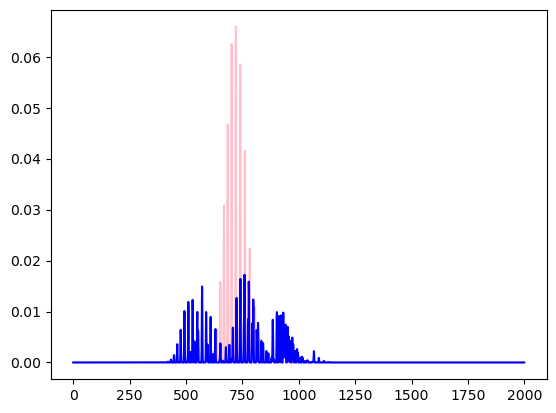

<function matplotlib.pyplot.show(close=None, block=None)>

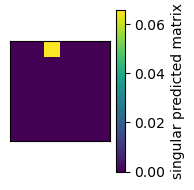

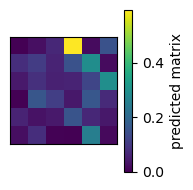

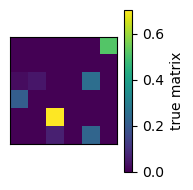

In [59]:
import matplotlib.pyplot as plt


plt.plot(singular_spectra[3], color='pink') ## sspectra going with singular matrix
plt.plot(X_val[1], color='blue') ## spectra going with full matrix
plt.show()

plt.figure(figsize=(2,2))
plt.imshow(interaction_matrix[2], cmap='viridis') # singular sparse matrices i created from y_pred
plt.colorbar(label = 'singular predicted matrix')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show

plt.figure(figsize=(2,2))
plt.imshow(y_pred[0], cmap='viridis')  ## y_pred matrix - full matrix
plt.colorbar(label = 'predicted matrix')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show

plt.figure(figsize=(2,2))
plt.imshow(y_true[0], cmap='viridis')  ## true matrix y_val
plt.colorbar(label = 'true matrix')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show
